In [1]:
%%html
<marquee style='width: 30%; color: blue;'><b>First Dance with Google's CoLab!</b></marquee>

In [0]:
import pandas as pd
import numpy as np
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1ry3Hxy6rJGkdrI5KcSMJeqnThjvMIbrl'
downloaded = drive.CreateFile({'id': file_id})

# Download the file to a local disk as 'exported.xlsx'.
downloaded.GetContentFile('exported.xlsx')

In [0]:
!pip install -q xlrd

In [0]:
df = pd.read_excel('exported.xlsx', sheet_name= 'qryUSMCTrendsByLOE')

In [6]:
df[:5]

,MasterQuestionID,Master_QNbr,FSMAO,TLC,MSC,InspectUnit,FY,Qtr,LOELongName,LOE_RISK,...,NoSS5,NoSS6,NoSS7,NoSS8,NoSS9,NoSS10,Analyst1,Title,NameFirst,NameLast
0,1001,1,West,I MEF,1st MarDiv,HQCo 1st MarRgmt,17,1,Property Accountability,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,64.0,Mr.,Aurelio,Anderson
1,1002,2,West,I MEF,1st MarDiv,HQCo 1st MarRgmt,17,1,Property Accountability,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,64.0,Mr.,Aurelio,Anderson
2,1003,3,West,I MEF,1st MarDiv,HQCo 1st MarRgmt,17,1,Property Accountability,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,64.0,Mr.,Aurelio,Anderson
3,1004,4,West,I MEF,1st MarDiv,HQCo 1st MarRgmt,17,1,Property Accountability,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,64.0,Mr.,Aurelio,Anderson
4,1005,5,West,I MEF,1st MarDiv,HQCo 1st MarRgmt,17,1,Property Accountability,Low,...,1.0,1.0,NaN,NaN,NaN,NaN,64.0,Mr.,Aurelio,Anderson


In [0]:
df = df.drop(['MasterQuestionID', 'Master_QNbr', 'QuestionID', 'LOERiskAssessmentHighest', 
                  'LOECat1RiskAssesment','LOECat2RiskAssesment', 'LOECat3RiskAssesment', 'LOECat4RiskAssesment', 
                  'LOECat5RiskAssesment', 'LOECat6RiskAssesment', 'LOECat7RiskAssesment', 'LOECat8RiskAssesment',
                  'NoSS1', 'NoSS2', 'NoSS3', 'NoSS4', 'NoSS5', 'NoSS6','NoSS7','NoSS8','NoSS9',
                  'NoSS10','Condition', 'Cause', 'RiskAssessment', 'NameFirst', 
                  'ActSS', 'ActSSNO', 'RCAFactor', 'LOEFactor', 'Analyst1', 'NameLast', 'TLC', 
                  'MSC', 'InspectUnit', 'Question'], axis = 1)

In [0]:
# reduce label to binomial class
df = df[df.FSMAO != 'WestPac']

Imuter transformation of missing values

In [0]:
from sklearn.base import TransformerMixin
import numpy as np

class SeriesImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        If the Series is of dtype Object, then impute with the most frequent object.
        If the Series is not of dtype Object, then impute with the mean.  

        """
    def fit(self, X, y=None):
        if   X.dtype == np.dtype('O'): self.fill = X.value_counts().index[0]
        else                            : self.fill = X.mean()
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

imputer = SeriesImputer()

imputer.fit(df['LOE_RISK'])
df['LOE_RISK'] = imputer.transform(df['LOE_RISK'])

imputer.fit(df['AnswerText'])
df['AnswerText'] = imputer.transform(df['AnswerText'])

imputer.fit(df['Title'])
df['Title'] = imputer.transform(df['Title'])

imputer.fit(df['PercentAttained'])
df['PercentAttained'] = imputer.transform(df['PercentAttained'])

imputer.fit(df['PP'])
df['PP'] = imputer.transform(df['PP'])

imputer.fit(df['PA'])
df['PA'] = imputer.transform(df['PA'])

imputer.fit(df['ActSSYES'])
df['ActSSYES'] = imputer.transform(df['ActSSYES'])

In [0]:
# Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the 
# .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series 
# respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

X, y = df.drop('FSMAO', axis = 1), df['FSMAO'].values

y consists of a single column with categories ‘East’ and ‘West’ and will be encoded to a mathematically relevant form, i.e., ‘1’ and ‘0’. This can be done with the Label Encoder class.
'1' == East
'0' == West



In [0]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

Convert categorical features to continuous (13 -> 106 features)

In [0]:
X = pd.get_dummies(X, drop_first=True)

In [0]:
# split df into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Keras**
Keras is a high level API for building Artificial Neural Networks. It uses Tensorflow or Theano backend for its under-the-hood operations. To install Keras, must have Tensorflow installed on machine. Colaboratory has Tensorflow already installed on the VM. To check the installation version, try:

!pip show tensorflow

You can also install a specific version of Tensorflow, if needed, using: 

!pip install tensorflow==1.2

Install Keras

In [0]:
!pip install -q keras

The classes Sequential and Dense are used to specify the nodes, connections, specifications of the neural network. As seen in the above section, we will need these to customize our learning network’s parameters and tune them.

In [16]:
# Import the Keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


To initialize the Neural Network, we shall create an object of the Sequential Class.

In [0]:
# Initialising the ANN
classifier = Sequential()

Design the network
For every **hidden layer**, define three basic parameters 
*   units (defines the number of neurons the layer will consist of)
*   [kernel_initializer](https://faroit.github.io/keras-docs/1.2.2/initializations/) (initial weights which the neuron will operate on the data input)
*   activation (activation function we choose to use for our data)


**First Layer**:

For the first layer, place 54 neurons with uniformly initialized weights activated by a ReLU activation function. Additionally, define the parameter input_dim = 106 as specification for the input layer. Note that we have 106 features columns in our dataset.

Cheat:
How did we decide that the number of units in the layer? People will tell you it is an art and it comes with experience and expertise. A simple way for a beginner is to add the total number of columns in X and y and divide by 2. (106+1)/2 = 53.5 ~ 54. hence , units = 54.

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 54, kernel_initializer = 'uniform', activation = 'relu', input_dim = 106))

Second Layer: The second layer is the same as the first layer without the input_dim parameter.

In [0]:
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))


Output Layer: Since our output is either of two values, we can use a single unit with uniform initializing weight. Here however, we use a sigmoid activation function.

In [0]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Fitting**: 
Run the Artificial Neural Network and let the backprop magic happen. Observe all this processing on Colaboratory instead of the local machine.

The batch_size is the number of inputs to simultaneously process. Epoch is an entire cycle in which all data passes through the neural network once. 

In [22]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
52748/52748 [==============================] - 28s 539us/step - loss: 0.6247 - acc: 0.6209
Epoch 2/100
25190/52748 [=============>................] - ETA: 14s - loss: 0.6013 - acc: 0.6410

52748/52748 [==============================] - 27s 521us/step - loss: 0.6004 - acc: 0.6430
Epoch 3/100
41450/52748 [======================>.......] - ETA: 5s - loss: 0.5882 - acc: 0.6559

52748/52748 [==============================] - 27s 518us/step - loss: 0.5879 - acc: 0.6549
Epoch 4/100
48550/52748 [==========================>...] - ETA: 2s - loss: 0.5789 - acc: 0.6627

52748/52748 [==============================] - 28s 523us/step - loss: 0.5791 - acc: 0.6630
Epoch 5/100
52110/52748 [============================>.] - ETA: 0s - loss: 0.5722 - acc: 0.6677

52748/52748 [==============================] - 27s 519us/step - loss: 0.5723 - acc: 0.6678
Epoch 6/100
52748/52748 [==============================] - 27s 520us/step - loss: 0.5665 - acc: 0.6718
Epoch 7/100
  420/52748 [..............................] - ETA: 28s - loss: 0.5533 - acc: 0.6905

52748/52748 [==============================] - 28s 524us/step - loss: 0.5598 - acc: 0.6771
Epoch 8/100
30180/52748 [================>.............] - ETA: 11s - loss: 0.5551 - acc: 0.6806

52748/52748 [==============================] - 27s 521us/step - loss: 0.5546 - acc: 0.6807
Epoch 9/100
43590/52748 [=======================>......] - ETA: 4s - loss: 0.5517 - acc: 0.6830

52748/52748 [==============================] - 27s 520us/step - loss: 0.5516 - acc: 0.6830
Epoch 10/100
49610/52748 [===========================>..] - ETA: 1s - loss: 0.5479 - acc: 0.6866

52748/52748 [==============================] - 27s 520us/step - loss: 0.5475 - acc: 0.6867
Epoch 11/100
52290/52748 [============================>.] - ETA: 0s - loss: 0.5441 - acc: 0.6886

52748/52748 [==============================] - 27s 518us/step - loss: 0.5440 - acc: 0.6887
Epoch 12/100
52748/52748 [==============================] - 27s 519us/step - loss: 0.5415 - acc: 0.6910
Epoch 13/100
  310/52748 [..............................] - ETA: 27s - loss: 0.5438 - acc: 0.6968

52748/52748 [==============================] - 27s 521us/step - loss: 0.5386 - acc: 0.6945
Epoch 14/100
29970/52748 [================>.............] - ETA: 11s - loss: 0.5339 - acc: 0.6998

52748/52748 [==============================] - 27s 520us/step - loss: 0.5362 - acc: 0.6966
Epoch 15/100
43490/52748 [=======================>......] - ETA: 4s - loss: 0.5326 - acc: 0.6992

52748/52748 [==============================] - 27s 519us/step - loss: 0.5337 - acc: 0.6979
Epoch 16/100
49780/52748 [===========================>..] - ETA: 1s - loss: 0.5310 - acc: 0.7016

52748/52748 [==============================] - 27s 516us/step - loss: 0.5315 - acc: 0.7014
Epoch 17/100
52380/52748 [============================>.] - ETA: 0s - loss: 0.5311 - acc: 0.7015

52748/52748 [==============================] - 27s 518us/step - loss: 0.5311 - acc: 0.7014
Epoch 18/100
52748/52748 [==============================] - 27s 520us/step - loss: 0.5280 - acc: 0.7003
Epoch 19/100
  200/52748 [..............................] - ETA: 30s - loss: 0.4990 - acc: 0.7250

52748/52748 [==============================] - 27s 515us/step - loss: 0.5264 - acc: 0.7035
Epoch 20/100
30530/52748 [================>.............] - ETA: 11s - loss: 0.5226 - acc: 0.7055

52748/52748 [==============================] - 27s 515us/step - loss: 0.5249 - acc: 0.7042
Epoch 21/100
44200/52748 [========================>.....] - ETA: 4s - loss: 0.5242 - acc: 0.7039

52748/52748 [==============================] - 27s 513us/step - loss: 0.5241 - acc: 0.7034
Epoch 22/100
50790/52748 [===========================>..] - ETA: 0s - loss: 0.5230 - acc: 0.7042

52748/52748 [==============================] - 27s 509us/step - loss: 0.5231 - acc: 0.7042
Epoch 23/100
52748/52748 [==============================] - 27s 517us/step - loss: 0.5217 - acc: 0.7064
Epoch 24/100
  120/52748 [..............................] - ETA: 29s - loss: 0.5007 - acc: 0.7583 

52748/52748 [==============================] - 27s 517us/step - loss: 0.5202 - acc: 0.7061
Epoch 25/100
30070/52748 [================>.............] - ETA: 11s - loss: 0.5156 - acc: 0.7109

52748/52748 [==============================] - 28s 523us/step - loss: 0.5182 - acc: 0.7078
Epoch 26/100
43300/52748 [=======================>......] - ETA: 4s - loss: 0.5173 - acc: 0.7110

52748/52748 [==============================] - 27s 519us/step - loss: 0.5182 - acc: 0.7102
Epoch 27/100
49720/52748 [===========================>..] - ETA: 1s - loss: 0.5146 - acc: 0.7109

52748/52748 [==============================] - 27s 517us/step - loss: 0.5162 - acc: 0.7098
Epoch 28/100
52310/52748 [============================>.] - ETA: 0s - loss: 0.5158 - acc: 0.7087

52748/52748 [==============================] - 27s 519us/step - loss: 0.5156 - acc: 0.7090
Epoch 29/100
52748/52748 [==============================] - 27s 518us/step - loss: 0.5163 - acc: 0.7102
Epoch 30/100
  300/52748 [..............................] - ETA: 29s - loss: 0.4645 - acc: 0.7267

52748/52748 [==============================] - 27s 521us/step - loss: 0.5136 - acc: 0.7117
Epoch 31/100
30290/52748 [================>.............] - ETA: 11s - loss: 0.5141 - acc: 0.7126

52748/52748 [==============================] - 27s 520us/step - loss: 0.5135 - acc: 0.7121
Epoch 32/100
43870/52748 [=======================>......] - ETA: 4s - loss: 0.5120 - acc: 0.7131

52748/52748 [==============================] - 27s 516us/step - loss: 0.5119 - acc: 0.7127
Epoch 33/100
49690/52748 [===========================>..] - ETA: 1s - loss: 0.5110 - acc: 0.7123

52748/52748 [==============================] - 27s 518us/step - loss: 0.5114 - acc: 0.7117
Epoch 34/100
52000/52748 [============================>.] - ETA: 0s - loss: 0.5110 - acc: 0.7137

52748/52748 [==============================] - 28s 522us/step - loss: 0.5109 - acc: 0.7137
Epoch 35/100
52550/52748 [============================>.] - ETA: 0s - loss: 0.5099 - acc: 0.7152

52748/52748 [==============================] - 28s 526us/step - loss: 0.5100 - acc: 0.7152
Epoch 36/100
52748/52748 [==============================] - 28s 523us/step - loss: 0.5090 - acc: 0.7164
Epoch 37/100
  110/52748 [..............................] - ETA: 30s - loss: 0.4462 - acc: 0.7455 

52748/52748 [==============================] - 27s 520us/step - loss: 0.5082 - acc: 0.7158
Epoch 38/100
30250/52748 [================>.............] - ETA: 11s - loss: 0.5033 - acc: 0.7207

52748/52748 [==============================] - 27s 520us/step - loss: 0.5077 - acc: 0.7175
Epoch 39/100
43870/52748 [=======================>......] - ETA: 4s - loss: 0.5069 - acc: 0.7164

52748/52748 [==============================] - 27s 516us/step - loss: 0.5074 - acc: 0.7157
Epoch 40/100
50050/52748 [===========================>..] - ETA: 1s - loss: 0.5070 - acc: 0.7165

52748/52748 [==============================] - 27s 514us/step - loss: 0.5068 - acc: 0.7161
Epoch 41/100
52748/52748 [==============================] - 27s 516us/step - loss: 0.5056 - acc: 0.7187


Epoch 42/100
52748/52748 [==============================] - 27s 514us/step - loss: 0.5053 - acc: 0.7193
Epoch 43/100
24670/52748 [=============>................] - ETA: 14s - loss: 0.5000 - acc: 0.7226

52748/52748 [==============================] - 28s 522us/step - loss: 0.5058 - acc: 0.7191
Epoch 44/100
41400/52748 [======================>.......] - ETA: 5s - loss: 0.5024 - acc: 0.7225

52748/52748 [==============================] - 27s 517us/step - loss: 0.5036 - acc: 0.7209
Epoch 45/100
48450/52748 [==========================>...] - ETA: 2s - loss: 0.5032 - acc: 0.7208

52748/52748 [==============================] - 27s 521us/step - loss: 0.5036 - acc: 0.7199
Epoch 46/100
51780/52748 [============================>.] - ETA: 0s - loss: 0.5039 - acc: 0.7202

52748/52748 [==============================] - 27s 519us/step - loss: 0.5041 - acc: 0.7194
Epoch 47/100
52748/52748 [==============================] - 27s 516us/step - loss: 0.5031 - acc: 0.7195
Epoch 48/100
  390/52748 [..............................] - ETA: 30s - loss: 0.5171 - acc: 0.6846

52748/52748 [==============================] - 27s 518us/step - loss: 0.5021 - acc: 0.7201
Epoch 49/100
30520/52748 [================>.............] - ETA: 11s - loss: 0.4993 - acc: 0.7223

52748/52748 [==============================] - 27s 515us/step - loss: 0.5010 - acc: 0.7203
Epoch 50/100
44500/52748 [========================>.....] - ETA: 4s - loss: 0.4999 - acc: 0.7209

52748/52748 [==============================] - 27s 512us/step - loss: 0.5002 - acc: 0.7211
Epoch 51/100
49600/52748 [===========================>..] - ETA: 1s - loss: 0.4995 - acc: 0.7217

52748/52748 [==============================] - 28s 522us/step - loss: 0.5002 - acc: 0.7209
Epoch 52/100
52380/52748 [============================>.] - ETA: 0s - loss: 0.4989 - acc: 0.7212

52748/52748 [==============================] - 27s 518us/step - loss: 0.4991 - acc: 0.7211
Epoch 53/100
52748/52748 [==============================] - 28s 522us/step - loss: 0.4986 - acc: 0.7244
Epoch 54/100
   10/52748 [..............................] - ETA: 1:18 - loss: 0.4416 - acc: 0.8000

52748/52748 [==============================] - 27s 518us/step - loss: 0.4979 - acc: 0.7233
Epoch 55/100
29940/52748 [================>.............] - ETA: 11s - loss: 0.4968 - acc: 0.7228

52748/52748 [==============================] - 27s 517us/step - loss: 0.4987 - acc: 0.7225
Epoch 56/100
43820/52748 [=======================>......] - ETA: 4s - loss: 0.4972 - acc: 0.7247

52748/52748 [==============================] - 27s 517us/step - loss: 0.4983 - acc: 0.7240
Epoch 57/100
49590/52748 [===========================>..] - ETA: 1s - loss: 0.4984 - acc: 0.7225

52748/52748 [==============================] - 27s 518us/step - loss: 0.4984 - acc: 0.7230
Epoch 58/100
52748/52748 [==============================] - 27s 514us/step - loss: 0.4972 - acc: 0.7226


Epoch 59/100
52748/52748 [==============================] - 27s 517us/step - loss: 0.4974 - acc: 0.7234
Epoch 60/100
25060/52748 [=============>................] - ETA: 14s - loss: 0.4936 - acc: 0.7264

52748/52748 [==============================] - 27s 512us/step - loss: 0.4966 - acc: 0.7243
Epoch 61/100
42060/52748 [======================>.......] - ETA: 5s - loss: 0.4941 - acc: 0.7265

52748/52748 [==============================] - 27s 513us/step - loss: 0.4960 - acc: 0.7254
Epoch 62/100
49210/52748 [==========================>...] - ETA: 1s - loss: 0.4963 - acc: 0.7248

52748/52748 [==============================] - 27s 517us/step - loss: 0.4956 - acc: 0.7254
Epoch 63/100
52340/52748 [============================>.] - ETA: 0s - loss: 0.4958 - acc: 0.7249

52748/52748 [==============================] - 27s 515us/step - loss: 0.4961 - acc: 0.7246
Epoch 64/100
52748/52748 [==============================] - 27s 515us/step - loss: 0.4951 - acc: 0.7254
Epoch 65/100
  620/52748 [..............................] - ETA: 27s - loss: 0.5012 - acc: 0.7065

52748/52748 [==============================] - 27s 515us/step - loss: 0.4950 - acc: 0.7249
Epoch 66/100
30740/52748 [================>.............] - ETA: 11s - loss: 0.4943 - acc: 0.7259

52748/52748 [==============================] - 27s 517us/step - loss: 0.4949 - acc: 0.7241
Epoch 67/100
43710/52748 [=======================>......] - ETA: 4s - loss: 0.4927 - acc: 0.7273

52748/52748 [==============================] - 27s 519us/step - loss: 0.4941 - acc: 0.7260
Epoch 68/100
50080/52748 [===========================>..] - ETA: 1s - loss: 0.4930 - acc: 0.7242

52748/52748 [==============================] - 27s 514us/step - loss: 0.4937 - acc: 0.7238
Epoch 69/100
52590/52748 [============================>.] - ETA: 0s - loss: 0.4929 - acc: 0.7262

52748/52748 [==============================] - 27s 518us/step - loss: 0.4929 - acc: 0.7262
Epoch 70/100
52748/52748 [==============================] - 27s 515us/step - loss: 0.4944 - acc: 0.7279
Epoch 71/100
  520/52748 [..............................] - ETA: 28s - loss: 0.4753 - acc: 0.7462

52748/52748 [==============================] - 27s 519us/step - loss: 0.4949 - acc: 0.7262
Epoch 72/100
30350/52748 [================>.............] - ETA: 11s - loss: 0.4880 - acc: 0.7313

52748/52748 [==============================] - 27s 516us/step - loss: 0.4918 - acc: 0.7275
Epoch 73/100
43700/52748 [=======================>......] - ETA: 4s - loss: 0.4931 - acc: 0.7267

52748/52748 [==============================] - 27s 519us/step - loss: 0.4940 - acc: 0.7256
Epoch 74/100
49950/52748 [===========================>..] - ETA: 1s - loss: 0.4928 - acc: 0.7283

52748/52748 [==============================] - 27s 516us/step - loss: 0.4942 - acc: 0.7270
Epoch 75/100
52270/52748 [============================>.] - ETA: 0s - loss: 0.4913 - acc: 0.7282

52748/52748 [==============================] - 28s 522us/step - loss: 0.4914 - acc: 0.7280
Epoch 76/100
52748/52748 [==============================] - 27s 516us/step - loss: 0.4920 - acc: 0.7287
Epoch 77/100
  430/52748 [..............................] - ETA: 27s - loss: 0.4717 - acc: 0.7465

52748/52748 [==============================] - 27s 514us/step - loss: 0.4911 - acc: 0.7289
Epoch 78/100
30290/52748 [================>.............] - ETA: 11s - loss: 0.4895 - acc: 0.7282

52748/52748 [==============================] - 27s 518us/step - loss: 0.4913 - acc: 0.7276
Epoch 79/100
43860/52748 [=======================>......] - ETA: 4s - loss: 0.4907 - acc: 0.7280

52748/52748 [==============================] - 27s 516us/step - loss: 0.4912 - acc: 0.7281
Epoch 80/100
49580/52748 [===========================>..] - ETA: 1s - loss: 0.4902 - acc: 0.7282

52748/52748 [==============================] - 27s 520us/step - loss: 0.4914 - acc: 0.7274
Epoch 81/100
52450/52748 [============================>.] - ETA: 0s - loss: 0.4896 - acc: 0.7294

52748/52748 [==============================] - 27s 517us/step - loss: 0.4895 - acc: 0.7294
Epoch 82/100
52748/52748 [==============================] - 27s 518us/step - loss: 0.4900 - acc: 0.7301
Epoch 83/100
  390/52748 [..............................] - ETA: 30s - loss: 0.5111 - acc: 0.7179

52748/52748 [==============================] - 27s 518us/step - loss: 0.4900 - acc: 0.7295
Epoch 84/100
30220/52748 [================>.............] - ETA: 11s - loss: 0.4829 - acc: 0.7345

52748/52748 [==============================] - 27s 520us/step - loss: 0.4892 - acc: 0.7292
Epoch 85/100
43080/52748 [=======================>......] - ETA: 5s - loss: 0.4873 - acc: 0.7295

52748/52748 [==============================] - 28s 523us/step - loss: 0.4890 - acc: 0.7283
Epoch 86/100
49650/52748 [===========================>..] - ETA: 1s - loss: 0.4881 - acc: 0.7292

52748/52748 [==============================] - 27s 516us/step - loss: 0.4884 - acc: 0.7292
Epoch 87/100
52050/52748 [============================>.] - ETA: 0s - loss: 0.4879 - acc: 0.7319

52748/52748 [==============================] - 27s 521us/step - loss: 0.4885 - acc: 0.7315
Epoch 88/100
52748/52748 [==============================] - 27s 519us/step - loss: 0.4881 - acc: 0.7317
Epoch 89/100
  200/52748 [..............................] - ETA: 29s - loss: 0.5567 - acc: 0.6650

52748/52748 [==============================] - 27s 520us/step - loss: 0.4879 - acc: 0.7300
Epoch 90/100
30050/52748 [================>.............] - ETA: 11s - loss: 0.4863 - acc: 0.7323

52748/52748 [==============================] - 27s 519us/step - loss: 0.4890 - acc: 0.7310
Epoch 91/100
43530/52748 [=======================>......] - ETA: 4s - loss: 0.4861 - acc: 0.7344

52748/52748 [==============================] - 27s 519us/step - loss: 0.4879 - acc: 0.7314
Epoch 92/100
49630/52748 [===========================>..] - ETA: 1s - loss: 0.4860 - acc: 0.7312

52748/52748 [==============================] - 27s 517us/step - loss: 0.4868 - acc: 0.7306
Epoch 93/100
52310/52748 [============================>.] - ETA: 0s - loss: 0.4868 - acc: 0.7308

52748/52748 [==============================] - 27s 518us/step - loss: 0.4869 - acc: 0.7306
Epoch 94/100
52748/52748 [==============================] - 27s 518us/step - loss: 0.4871 - acc: 0.7311
Epoch 95/100
  410/52748 [..............................] - ETA: 27s - loss: 0.4879 - acc: 0.7244

52748/52748 [==============================] - 27s 517us/step - loss: 0.4863 - acc: 0.7313
Epoch 96/100
30810/52748 [================>.............] - ETA: 11s - loss: 0.4871 - acc: 0.7304

52748/52748 [==============================] - 27s 513us/step - loss: 0.4884 - acc: 0.7301
Epoch 97/100
44220/52748 [========================>.....] - ETA: 4s - loss: 0.4852 - acc: 0.7303

52748/52748 [==============================] - 27s 516us/step - loss: 0.4860 - acc: 0.7305
Epoch 98/100
50520/52748 [===========================>..] - ETA: 1s - loss: 0.4863 - acc: 0.7315

52748/52748 [==============================] - 27s 513us/step - loss: 0.4862 - acc: 0.7318
Epoch 99/100
52460/52748 [============================>.] - ETA: 0s - loss: 0.4861 - acc: 0.7317

52748/52748 [==============================] - 27s 520us/step - loss: 0.4860 - acc: 0.7318
Epoch 100/100
52748/52748 [==============================] - 27s 518us/step - loss: 0.4862 - acc: 0.7317


Making Predictions and Confusion Matrix.

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

In [41]:
cm

array([[4610, 1918],
       [2233, 4427]])

|-------------|Predicted NO | Predicted Yes|
|-------------|-------------|--------------|
|Actual No    | TN = 4610   | FP = 1918    |
|-------------|-------------|--------------|      
|Actual yes   | FN = 2233   | FP = 4427    |
|-------------|-------------|--------------|

In [0]:
tn, fp, fn, tp  = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

In [0]:
accuracy = (tp + tn) / (tn + fp +tp +fn)

In [36]:
accuracy

0.685244161358811

Precision:  percent of the positive cases predicted? 

In [0]:
precision = tp / (fn + tp)

Recall: percent of correct positive predictions?

In [0]:
recall = tp / (fp + tp)

In [39]:
precision

0.6647147147147147

In [40]:
recall

0.6977147360126084

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'ANN ROC Curve')

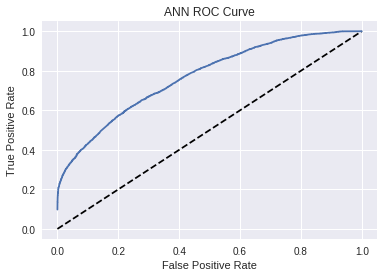

In [44]:
from sklearn.metrics import roc_curve

y_pred_prob = classifier.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr, label='ANN')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ANN ROC Curve')